# SCIPY

Reading image as an vector array

Source: 
- http://www.scipy-lectures.org/advanced/image_processing/
- https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.misc.imread.html

In [1]:
'''
face = Get a 1024 x 768, color image of a raccoon face.
'''
from scipy import misc
f = misc.face()
# misc.imsave('face.png', f) # uses the Image module (PIL)

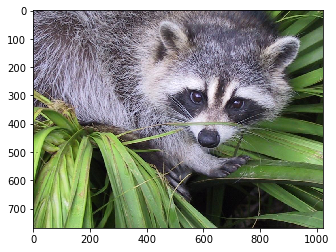

In [2]:
import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [3]:
# Creating a numpy array from an image file:
face = misc.imread('face.png')

print(type(face))
    
print(face.shape, face.dtype)

<class 'numpy.ndarray'>
(768, 1024, 3) uint8


## Basic Manipulations

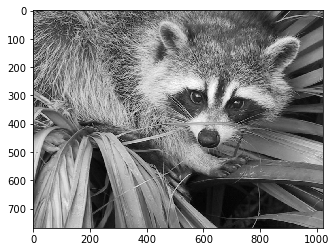

In [4]:
face = misc.face(gray=True)
plt.imshow(face,cmap=plt.cm.gray)
plt.show()

In [5]:
face = misc.face(gray=True)
face[0, 40]

127

In [6]:
face[10:13, 20:23]

array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

(768, 1024)


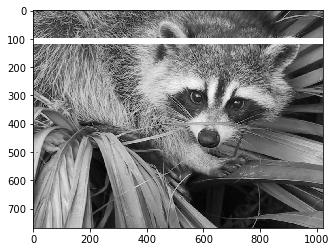

In [7]:
'''
Create a white line 
'''
face[100:120] = 255
print(face.shape)

plt.imshow(face,cmap=plt.cm.gray)
plt.show()

In [8]:
face[100:120].shape

(20, 1024)

In [9]:
lx, ly = face.shape

In [10]:
import numpy as np
X, Y = np.ogrid[0:lx, 0:ly]
print(X.shape,Y.shape)

(768, 1) (1, 1024)


In [13]:
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0
# Fancy indexing
face[range(400), range(400)] = 255

## Statistical Information

In [14]:
face = misc.face(gray=True)
print(face.shape)
print(face.mean())
print(face.max())
print(face.min())

(768, 1024)
113.480267843
250
0


In [16]:
ly, lx = face.shape

# Cropping
crop_face = face[int(lx/4):int(-lx/4), int(ly/4):int(-ly/4)]

#Crop to center
crop_face = face[int(lx/4):int(-lx/4), int(ly/4):int(-ly/4)]



In [17]:
# cropping for BW 
def crop_img_scipy(img): # try size 32 
    #h, w = img.shape # h = height = row, w = width = column 
    h = img.shape[0]
    w = img.shape[1]

    if h == w: return img 
    
    elif w > h: 
        
        return img[0:int(h) , int((w -h)/2):int(-(w-h)/2)]
    else: # w < h 
        return img[int((h-w)/2):int(-(h-w)/2),0:int(w)]

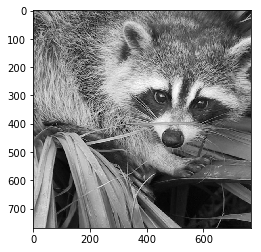

In [18]:
#crop_face = face[0:int(h) , int((w -h)/2):int(-(w-h)/2)]
#crop_img_scipy(face)
#d = (lx - ly)/2

#[ d : -d  , 0: ly ]
 
plt.imshow(crop_img_scipy(face),cmap=plt.cm.gray)
plt.show()

In [19]:
lx -ly

256

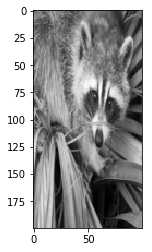

In [20]:
plt.imshow(misc.imresize(face,(200,100)),cmap=plt.cm.gray)
plt.show()

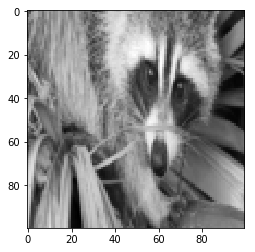

In [21]:
# cropping the skewed image 
plt.imshow(crop_img_scipy(misc.imresize(face,(200,100))),cmap=plt.cm.gray)
plt.show()

(768, 1024, 3)


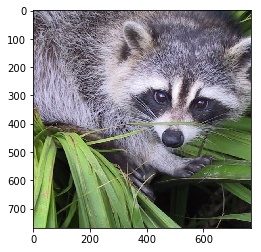

In [22]:
'''
cropping in color
'''
face = misc.face()
print(face.shape)

plt.imshow(crop_img_scipy(face),cmap=plt.cm.gray)
plt.show()

<class 'numpy.ndarray'>
(299, 300, 3) uint8


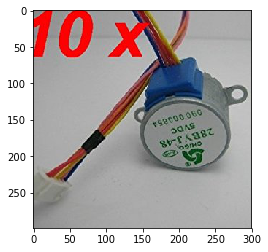

In [23]:
path = "/Users/inshique/Desktop/DL_Amz_Project/data/amazon_img/B0089J9EFG.jpg"
face = misc.imread(path)

print(type(face))
    
print(face.shape, face.dtype)

plt.imshow(face)
plt.show()


In [24]:
crop_img_scipy(face)

array([], shape=(299, 0, 3), dtype=uint8)

/Users/inshique/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


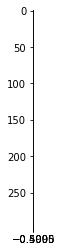

In [28]:
plt.imshow(crop_img_scipy(face))
plt.show()

In [29]:
from scipy import misc
# cropping for BW 
def crop_resize_img_scipy(img,size,interp='bilinear'): # try size 32 
    #h, w = img.shape # h = height = row, w = width = column 
    h = img.shape[0]
    w = img.shape[1]

    if h == w: 
        return misc.imresize(img,(size,size),interp = interp) 
    elif w > h: 
        t = int(size * w/h) # resize in the same ratio
        img = misc.imresize(img,(size,t),interp = interp)
        
        return img[0:size, int((t-size)/2):int((t+size)/2) ]
    else: # w < h 
        t = int(size * h/w) # resize in the same ratio
        img = misc.imresize(img,(t,size),interp = interp)

        return img[int((t-size)/2):int((t+size)/2), 0:size ]

       
#        return img[int((h-w)/2):int(-(h-w)/2),0:int(w)]

In [30]:
print(face.shape)

h = 299
w = 300 
 
print(face[0:int(h), int((w-h)/2):int(-(w-h)/2)])

#print(int((w -h)/2),int(-(w-h)/2))
    
size=224
t = int(224 * w/h) # resize in the same ratio        

print(face[int((t-size)/2):int((t+size)/2), 0:size].shape)

(299, 300, 3)
[]
(224, 224, 3)


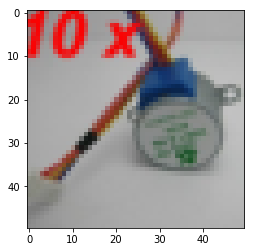

In [31]:
# testing regular 
plt.imshow(crop_resize_img_scipy(face,50))
plt.show()

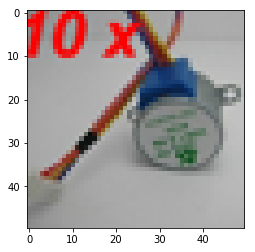

In [32]:
# testing regular 
plt.imshow(crop_resize_img_scipy(face,50,'bicubic'))
plt.show()

(200, 100, 3)


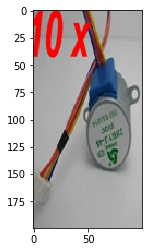

(100, 100, 3)


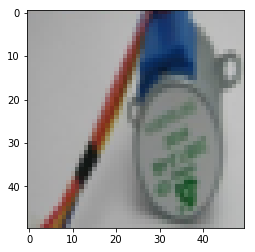

In [33]:
# cropping the skewed image 
face2 = misc.imresize(face,(200,100))

print(misc.imresize(face,(200,100)).shape)

plt.imshow((misc.imresize(face,(200,100))))
plt.show()

print(crop_resize_img_scipy(misc.imresize(face,(200,100)),100).shape)
plt.imshow(crop_resize_img_scipy(misc.imresize(face,(200,100)),50))
plt.show()

100
(200, 100, 3)
(100, 50, 3)


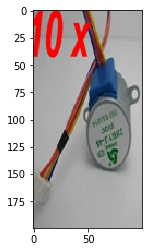

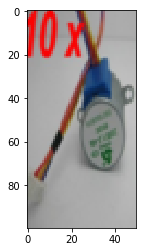

In [34]:
size = 50
h = 200
w= 100

t = int(size * h/w) # resize in the same ratio
print(t)
img = misc.imresize(face2,(t,size,))
print(face2.shape)
print(img.shape)

plt.imshow(face2)
plt.show()

plt.imshow(img)
plt.show()

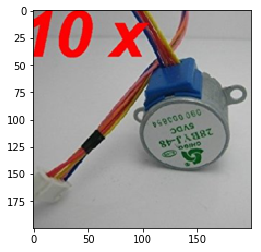

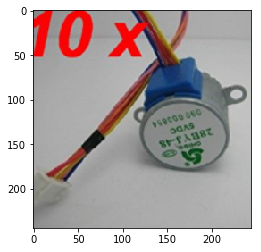

In [35]:
# cropping the squre image 

plt.imshow((misc.imresize(face,(200,200))))
plt.show()

plt.imshow(crop_resize_img_scipy(misc.imresize(face,(200,200)),244))
plt.show()

(100, 200, 3)


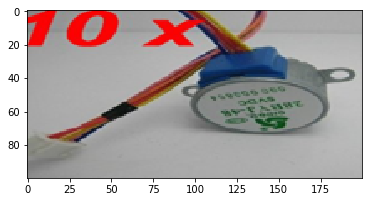

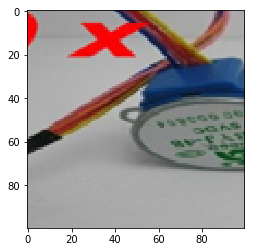

In [36]:
# cropping the skewed image 

print(misc.imresize(face,(100,200)).shape)

plt.imshow((misc.imresize(face,(100,200))))
plt.show()

plt.imshow(crop_resize_img_scipy(misc.imresize(face,(100,200)),100))
plt.show()

In [37]:
face[0:100,0:100,].shape

(100, 100, 3)

In [38]:
np.array(crop_resize_img_scipy(face,32,'bicubic'), dtype='float32')


array([[[ 143.,  128.,  129.],
        [ 212.,   49.,   49.],
        [ 225.,   36.,   36.],
        ..., 
        [ 170.,  170.,  170.],
        [ 170.,  170.,  170.],
        [ 170.,  170.,  170.]],

       [[ 233.,   21.,   20.],
        [ 255.,    0.,    0.],
        [ 203.,   67.,   67.],
        ..., 
        [ 171.,  171.,  171.],
        [ 171.,  171.,  171.],
        [ 170.,  170.,  170.]],

       [[ 201.,   64.,   62.],
        [ 247.,    4.,    4.],
        [ 183.,   97.,   97.],
        ..., 
        [ 172.,  172.,  172.],
        [ 171.,  171.,  171.],
        [ 171.,  171.,  171.]],

       ..., 
       [[ 123.,  123.,  123.],
        [ 127.,  127.,  127.],
        [ 136.,  136.,  136.],
        ..., 
        [ 179.,  179.,  179.],
        [ 180.,  180.,  180.],
        [ 180.,  180.,  180.]],

       [[ 132.,  132.,  132.],
        [ 139.,  139.,  139.],
        [ 147.,  147.,  147.],
        ..., 
        [ 178.,  178.,  178.],
        [ 177.,  177.,  177.],
        [ 

<class 'numpy.ndarray'>
(32, 32, 3) uint8


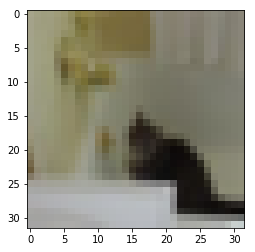

In [39]:
#path =  "/Users/inshique/Desktop/DL_Amz_Project/data/assignment2-data/train-(32, 32, 3)/Grocery & Gourmet Food/B004DBQXM6.jpg"
#path = "/Users/inshique/Desktop/DL_Amz_Project/data/assignment2-data/test-(32, 32, 3)/Grocery & Gourmet Food/B004FTC6UY.jpg"
path= "/Users/inshique/Dropbox/Classes/3_Spring_2017/432 Deep Learning/Codes/assignment2-data-ignore/train-(32, 32, 3)/cat/253.png"
#B004FTC6UY.jpeg
face = misc.imread(path)

print(type(face))

print(face.shape, face.dtype)

plt.imshow(face)
plt.show()

(100, 100, 3)


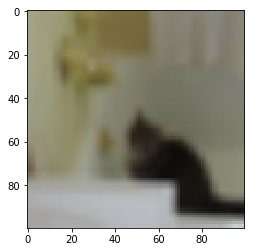

In [40]:
print(crop_resize_img_scipy(face,100).shape)
plt.imshow(crop_resize_img_scipy(face,100))
plt.show()

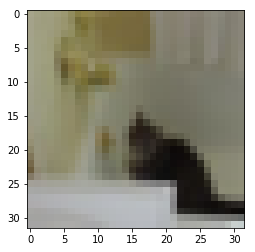

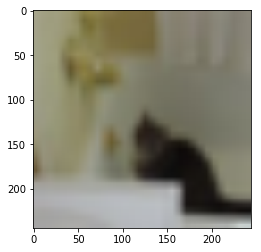

In [41]:
plt.imshow(misc.imresize(face,(32,32)))
plt.show()

plt.imshow(misc.imresize(face,(244,244)))
plt.show()

In [43]:
xdata = [] 
xdata.append(face)
xdata.append(face2)
len(xdata)
#print(xdata)

print(face.shape)
#np.array(xdata, dtype='float32')
#np.array(xdata, dtype='object')

np.array(xdata[0], dtype='float32').shape

#print(xdata[0].dtype)

(32, 32, 3)


(32, 32, 3)

In [44]:
x = np.array

In [45]:
x

<function numpy.core.multiarray.array>

In [46]:
misc.imresize(face, (32,32), interp='bicubic').shape

(32, 32, 3)